In [1]:
import pandas as pd
import numpy as np

pd.set_option("max_columns",None)

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/codebasics/py/master/ML/9_decision_tree/salaries.csv",sep=",")

In [3]:
data.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [4]:
from sklearn.preprocessing import LabelEncoder

le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [5]:
data['company_n']=le_company.fit_transform(data['company'])
data['job_n']=le_job.fit_transform(data['job'])
data['degree_n']=le_degree.fit_transform(data['degree'])

In [6]:
data.drop(['company','job','degree'],axis='columns',inplace=True)

In [7]:
inputs = data.drop(['salary_more_then_100k'], axis=1) 
target = data['salary_more_then_100k']

In [8]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [9]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [10]:
model.fit(inputs,target)

DecisionTreeClassifier()

In [11]:
model.score(inputs, target)

1.0

### Is salary of Google, Computer Engineer, Bachelors degree > 100 k ?

In [12]:
model.predict([[2,1,0]])

array([0], dtype=int64)

### Is salary of Google, Computer Engineer, Masters degree > 100 k ?

In [13]:
model.predict([[2,1,1]])

array([1], dtype=int64)

## Exercise: Build decision tree model to predict survival based on certain parameters

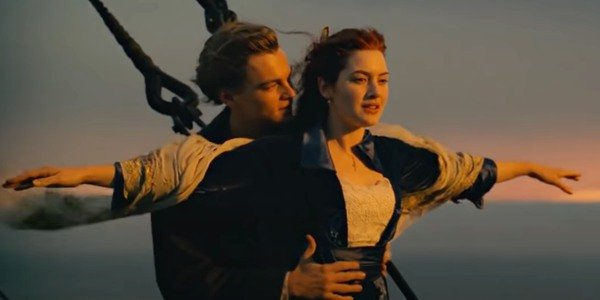

In [14]:
from IPython.display import Image
Image("titanic.jpg")

### [TITANIC DATASET]("https://github.com/codebasics/py/blob/master/ML/9_decision_tree/Exercise/titanic.csv")

### In this file using following columns build a model to predict if person would survive or not,
Pclass

Sex

Age

Fare

In [15]:
titanic_df = pd.read_csv("titanic_train.csv")

In [16]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
new_titanic_df = titanic_df[['Pclass', 'Sex', 'Age', 'Fare','Survived']]

In [18]:
new_titanic_df

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [19]:
inputs = new_titanic_df.drop('Survived', axis=1)
target = new_titanic_df['Survived']

In [20]:
#Label Encoding

inputs.Sex = inputs.Sex.map({'male':1, 'female':2})

In [21]:
inputs.Age[:10]
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [23]:
len(X_train)

712

In [24]:
len(X_test)

179

In [25]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [26]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [27]:
model.score(X_test, y_test)

0.7541899441340782